In [7]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

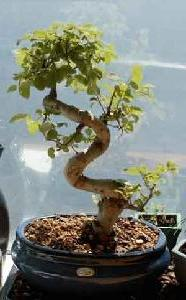

In [8]:
from brainle.datamodules.datasets.images_archive_dataset import ImagesArchiveDataset
idx = 2022
dataset = ImagesArchiveDataset('../data/archive.zip')
dataset[idx]

In [9]:
import torch 
import torchvision 
import cv2 
import numpy as np
from torchvision import transforms
from PIL import Image

transform = transforms.Compose([
    transforms.Resize(size=128),
    transforms.RandomCrop(size=(128, 128)),
    transforms.PILToTensor(),
    transforms.ConvertImageDtype(torch.float),
])

image = transform(dataset[idx]).unsqueeze(0)
image.shape

torch.Size([1, 3, 128, 128])

# 

torch.Size([4, 3, 16, 16])


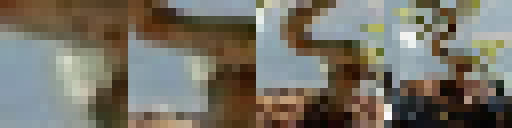

In [10]:
from brainle.models.architectures.fovea_cropper import FoveaCropper

import torchvision.transforms.functional as F
from einops import rearrange, reduce
    
cropper = FoveaCropper(out_size = 16, sizes=[16, 32, 64, 128])
y = cropper(image)
print(y.shape)
images = rearrange(y, 'n c h w -> c h (n w)')

transform = transforms.Compose([
    transforms.Resize(
        size=128, 
        interpolation=F.InterpolationMode.NEAREST
    ),
    transforms.ToPILImage()
])
transform(images)

torch.Size([1, 3, 128, 128])


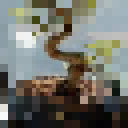

In [11]:
overlap = cropper.get_overlap(y, size=128)
print(overlap.shape)
transforms.ToPILImage()(overlap[0])